# Research Skills: Image Analysis
## Worksheet 3 : Image Enhancement in the Frequency Domain 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence - Tilburg University

In the session, we will learn
* Fourier Transforms
   * 2D Fourier transforms in an Image
   * Separating the frequency components in an Fourier transformed image 
* Image Smoothing in the Spatial and Frequency Domain 
* Image Sharpening in the Spatial and Frequency Domain 

# 1. 2D Fourier transform
The following code loads an image, computes its fourier transform and displays the spectrum 

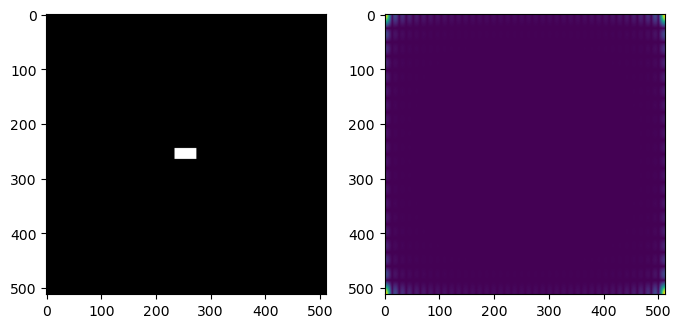

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage import io 

%matplotlib inline

im = io.imread('images/image.tif')
F = fftn(im)

S = abs(F) #magnitude 

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
# image in spatial domain
plt.imshow(im,cmap='gray')
# frequency spectrum of image 
plt.subplot(2,2,2), 
plt.imshow(S)

Find the range (maximum and minimum) of F. Are they complex numbers? 

In [3]:
#
#  Your code goes here 
#
print('Max mag', F.max(), 'Min mag', F.min())
print('They are complex numbers')

Max mag (204000-0j) Min mag (-203455.153531453-3745.578628202299j)
They are complex numbers


The four bright spots in the corners of the image are the result of the periodicity property. We can move the origin of the transform to the center of the frequency rectangle with `fftshift`, which swaps the quadrants of F. For example, if `a = [1 2; 3 4]`,  `fftshift(a) = [ 4 3; 2 1]`. Due to the large range it is diffcult to display the whole range and we get poor visual detail. The code below resolves this issue via a log transformation.

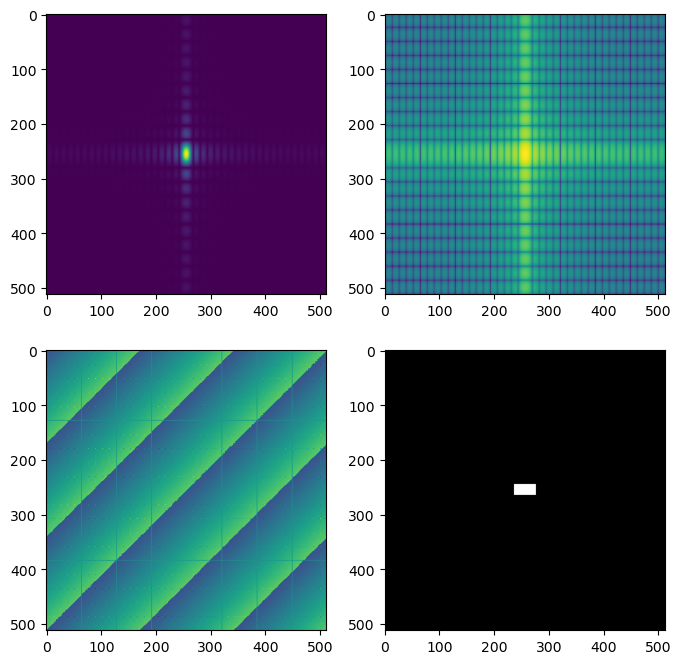

In [4]:
# fftshift moves the origin of the transform to the center of the frequency rectangle. 
Fc = fftshift(F)
plt.figure(figsize=(8,8))

plt.subplot(2,2,1), 
plt.imshow(abs(Fc)) 

# A log transformation allows better visual details 
S2 = np.log(1 + abs(Fc));
plt.subplot(2,2,2), 
plt.imshow(S2);

pFc = np.angle(Fc); #phase 
plt.subplot(2,2,3), 
plt.imshow(pFc);

# convert back 
im2 = ifftn(F)
plt.subplot(2,2,4), 
plt.imshow(np.real(im2),cmap='gray');

1. Rotate the image you loaded (`images/image.tif`) by 45 degrees. Hint (`imR = rotate(im,45,resize=True)` to keep the image size the same.  
2. Compute the Fourier transform and display the magnitude and phase of the frequency spectrum. 

magnitude 200058.89734436473
Phase 1.5593306601759558


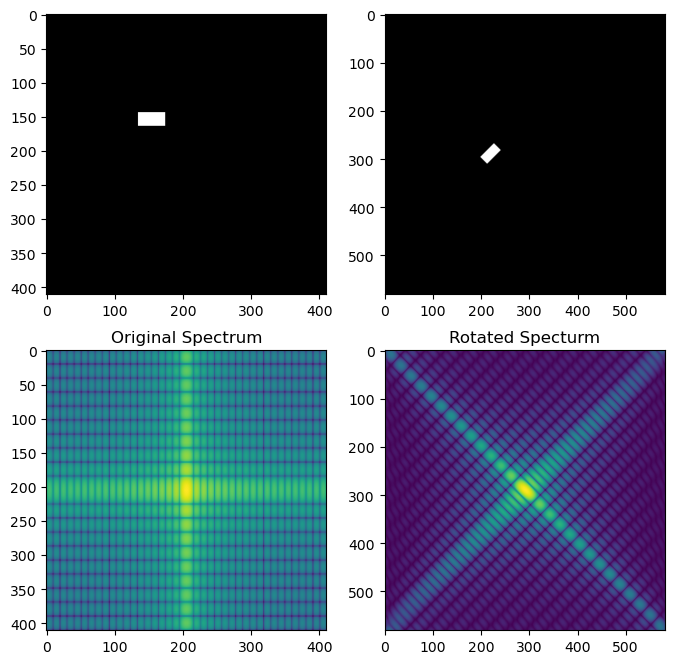

In [5]:
from skimage.transform import rotate
#
# Your code goes here 
#

im = io.imread('images/image.tif') 
im = im[100:-1, 100:-1]
F = fftn(im)
Fc = fftshift(F)

imR = rotate(im, 45, resize=True)

FR = fftn(imR)
FRc = fftshift (FR)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1),
plt.imshow(im, cmap = 'gray') 
plt.subplot (2,2,2), 
plt.imshow(imR, cmap = 'gray') 
S2 = np.log(1+ abs (Fc)); 
plt.subplot (2,2,3),
plt.imshow(S2);
plt.title('Original Spectrum');
plt.subplot(2,2,4),
S2r = np.log(1 + abs (FRc));
plt.imshow(S2r);
plt.title('Rotated Specturm')

print('magnitude', np.sqrt(np.real (F[1,1])*np.real (F[1,1]) + np.imag(F[1,1])*np.imag(F[1,1])))
print('Phase', np.angle (F[1,1]))


# 2. Low pass filtering

In image analysis, low pass filters allow only low frequencies from the frequency domain obtained with DFT and blocks all high frequencies beyond a cut-off value.  Low-frequency components correspond to average (flat) regions and low pass filters tend to remove detailed information such as edges. The code below converts perform a 2D discrete Fourier transform on an image with scipy.fftpack and obtain the frequency domain representation of the image. We keep only the low frequency components and perform an inverse Fourier transform to reconstruct the image.  

1. Try changing the low frequency threshold (fsize). What do you see? 

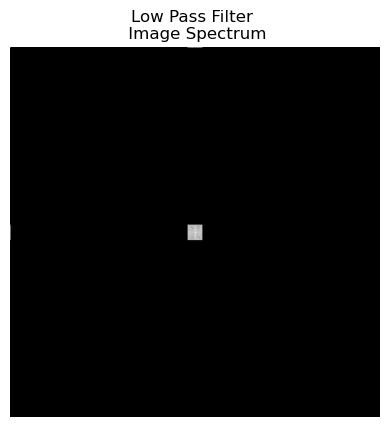

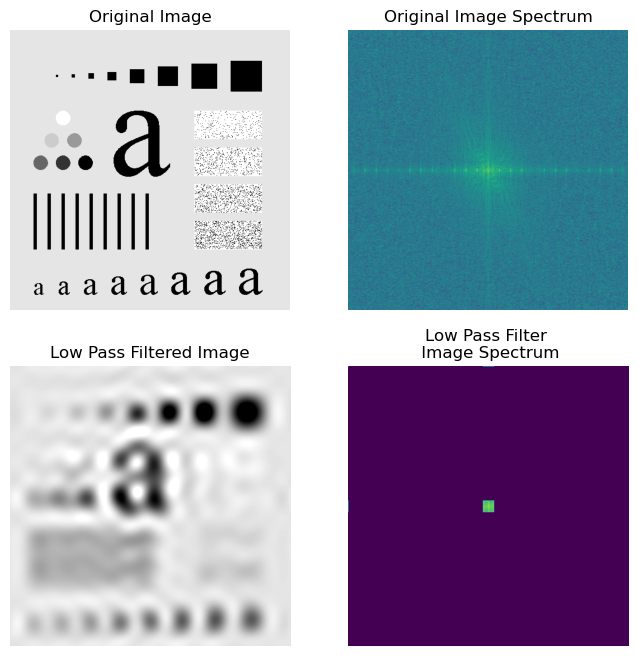

In [20]:
# load image 
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
im = io.imread('images/original_test_pattern_freq.tif')

#im = io.imread('images\spectrum.tif')

# convert to 
freq1 = fftn(im)
(w, h) = freq1.shape
half_w, half_h = int(w/2), int(h/2)

freq1 = fftshift(freq1)
freq2 = np.copy(freq1)

# fitlering the image in the frequency spectrum 

#low frequency cut off
fsize = 10 ##### (CHANGE THIS NUMBER AND SEE WHAT YOU GET)
freq2[1:half_w-fsize,:] = 0
freq2[half_w+fsize+1:w,:] = 0
freq2[:,1:half_h-fsize] = 0
freq2[:,half_h+fsize:h] = 0

plt.figure()
plt.imshow(20*np.log10( 0.1 + np.abs(freq2)),cmap='gray'), 
plt.title('Low Pass Filter \n Image Spectrum'), plt.axis('off')
plt.show()

im1 = np.clip(ifftn(ifftshift(freq2)).real,0,255)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(im,cmap='gray') 
plt.title('Original Image'), plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(20*np.log10( 0.1 + np.abs(freq1))), 
plt.title('Original Image Spectrum'), plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(im1,cmap='gray') 
plt.title('Low Pass Filtered Image'), plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(20*np.log10( 0.1 + np.abs(freq2))), 
plt.title('Low Pass Filter \n Image Spectrum'), plt.axis('off')
plt.show()


# 3. Sharpening in the freqeuncy domain (High pass filtering)
In image analysis, high pass filters allow only high frequencies from the frequency domain obtained with DFT and blocks all low frequencies beyond a cut-off value.  High-frequency components correspond to edges, details, noise and high pass filters tend to extract or enhance them. 
The following line of code keeps only the high frequency components above a threshold $fsize$

        freq2[half_w-fsize:half_w+fsize+1,half_h-fsize:half_h+fsize+1] = 0

Write code to
1. Load an image and convert the image to the frequency domain with `fftn` or `fft2`
2. Keep only the high frequency components using the follwing line of code above. Chose any frequency threshold (`fsize`) you wish. 
3. Perform an inverse Fourier transform to reconstruct the image.  
4. Add this image to the original image.  Display your results. 


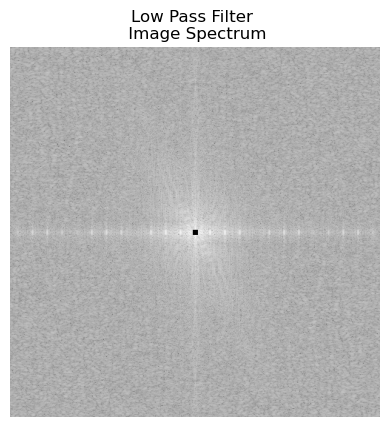

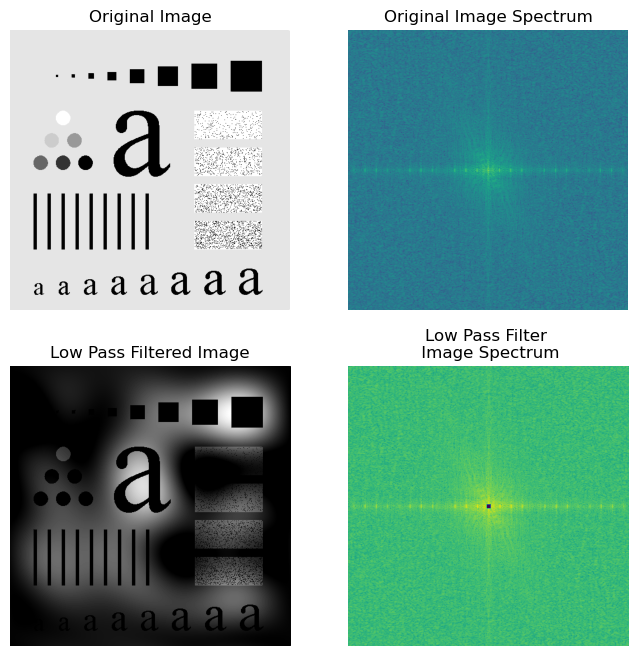

In [27]:
#
# Your code goes here
#
# load image 
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
im = io.imread('images/original_test_pattern_freq.tif')

#im = io.imread('images\spectrum.tif')

# convert to 
freq1 = fftn(im)
(w, h) = freq1.shape
half_w, half_h = int(w/2), int(h/2)

freq1 = fftshift(freq1)
freq2 = np.copy(freq1)

# fitlering the image in the frequency spectrum 

#low frequency cut off
fsize = 3 ##### (CHANGE THIS NUMBER AND SEE WHAT YOU GET)
#freq2[1:half_w-fsize,:] = 0
#freq2[half_w+fsize+1:w,:] = 0
#freq2[:,1:half_h-fsize] = 0
#freq2[:,half_h+fsize:h] = 0

freq2[half_w-fsize:half_w+fsize+1,half_h-fsize:half_h+fsize+1] = 0

plt.figure()
plt.imshow(20*np.log10( 0.1 + np.abs(freq2)),cmap='gray'), 
plt.title('Low Pass Filter \n Image Spectrum'), plt.axis('off')
plt.show()

im1 = np.clip(ifftn(ifftshift(freq2)).real,0,255)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(im,cmap='gray') 
plt.title('Original Image'), plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(20*np.log10( 0.1 + np.abs(freq1))), 
plt.title('Original Image Spectrum'), plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(im1,cmap='gray') 
plt.title('Low Pass Filtered Image'), plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(20*np.log10( 0.1 + np.abs(freq2))), 
plt.title('Low Pass Filter \n Image Spectrum'), plt.axis('off')
plt.show()


# 4. Filtering with a Gaussian kernel in the Frequency domain 

## 4.1 Creating a Gaussian blur kernel in the frequency domain
The code below creates a Gaussian kernel which can be used for smoothing and shows how to convert the kernel to the frequency domain. The code also displays these kernels in 2D and 3D.  

(50, 50)
(50, 50)


/tmp/ipykernel_1303388/2310831368.py:8: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(50, 5), signal.gaussian(50,5))


Text(0.5, 0.92, 'Gaussian Kernel \n in Frequency Domain')

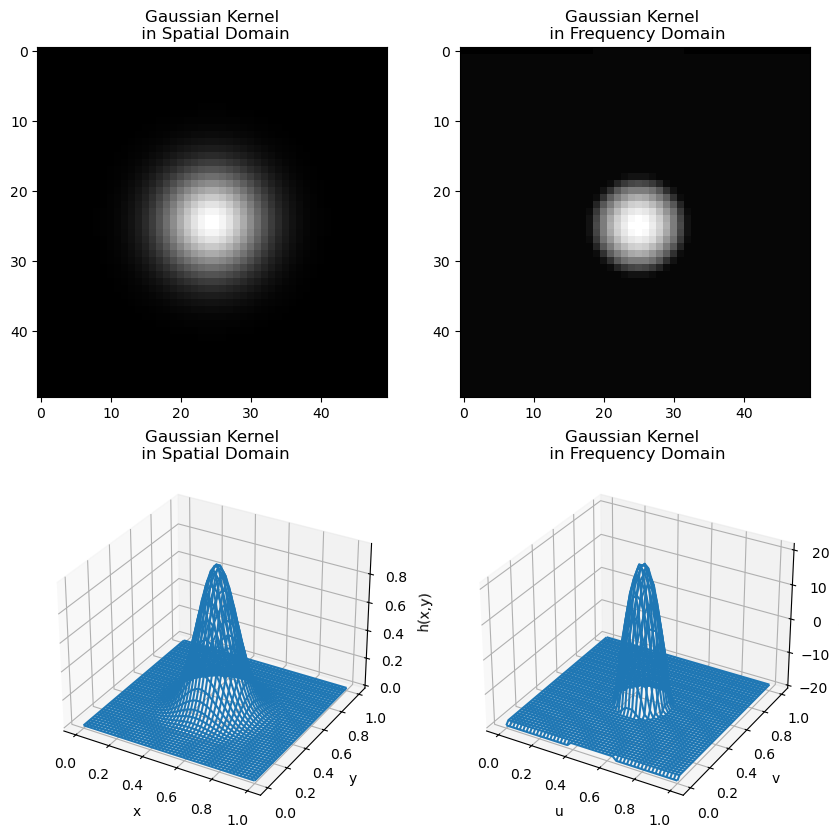

In [31]:
from scipy import signal
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline

# 2D Gaussian kernel of size image with variance of 2
gauss_kernel = np.outer(signal.gaussian(50, 5), signal.gaussian(50,5))
print(gauss_kernel.shape) 
# display it in 2D and 3D  and convert to fourier space
freq_kernel = fftn(ifftshift(gauss_kernel))
freq_kernel_log = np.real(10*np.log10( 0.01 + abs(fftshift(freq_kernel))))
freq_kernel_log = freq_kernel_log.astype(int)

fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1), 
plt.imshow(gauss_kernel,cmap='gray')
plt.title('Gaussian Kernel\n in Spatial Domain')
plt.subplot(2,2,2), 
plt.imshow(freq_kernel_log,cmap='gray')
plt.title('Gaussian Kernel \n in Frequency Domain')

x = np.linspace(0, 1, 50)
y =  np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)
print(freq_kernel.shape)
ax = fig.add_subplot(223, projection='3d')
ax.plot_wireframe(X, Y, gauss_kernel, cmap='summer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h(x,y)');
ax.set_title('Gaussian Kernel\n in Spatial Domain')

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_wireframe(X, Y, freq_kernel_log, cmap='summer')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('H(u,v)');
ax.set_title('Gaussian Kernel \n in Frequency Domain')




# 4.2 Filtering with a Gaussian blur kernel in the frequency domain

The code below loads an image and transforms the image (`im`) to the frequency domain (`im_freq`). The code below also creates a Gaussian kernel in the spatial domain (`gauss_kernel`) and transform the kernel to the frequency domain.  
1. Confirm that the transformed image `im_freq` and transformed kernel `freq_kernel` have the same dimensions. 
2. Multiply `im_freq` and `freq_kernel`.
3. Perform an Inverse Fourier Transform to convert the result of Question 2 back to the spatial domain
4. Display the frequency spectrum obtained in Question 2 and the images obtained in Question 3.  

196852.86983588227 95040.5297483382 float64


/tmp/ipykernel_7309/1201663973.py:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 15), signal.gaussian(im_freq.shape[1], 15))


(Text(0.5, 1.0, 'Filtered Image Spectrum'), (-0.5, 255.5, 255.5, -0.5))

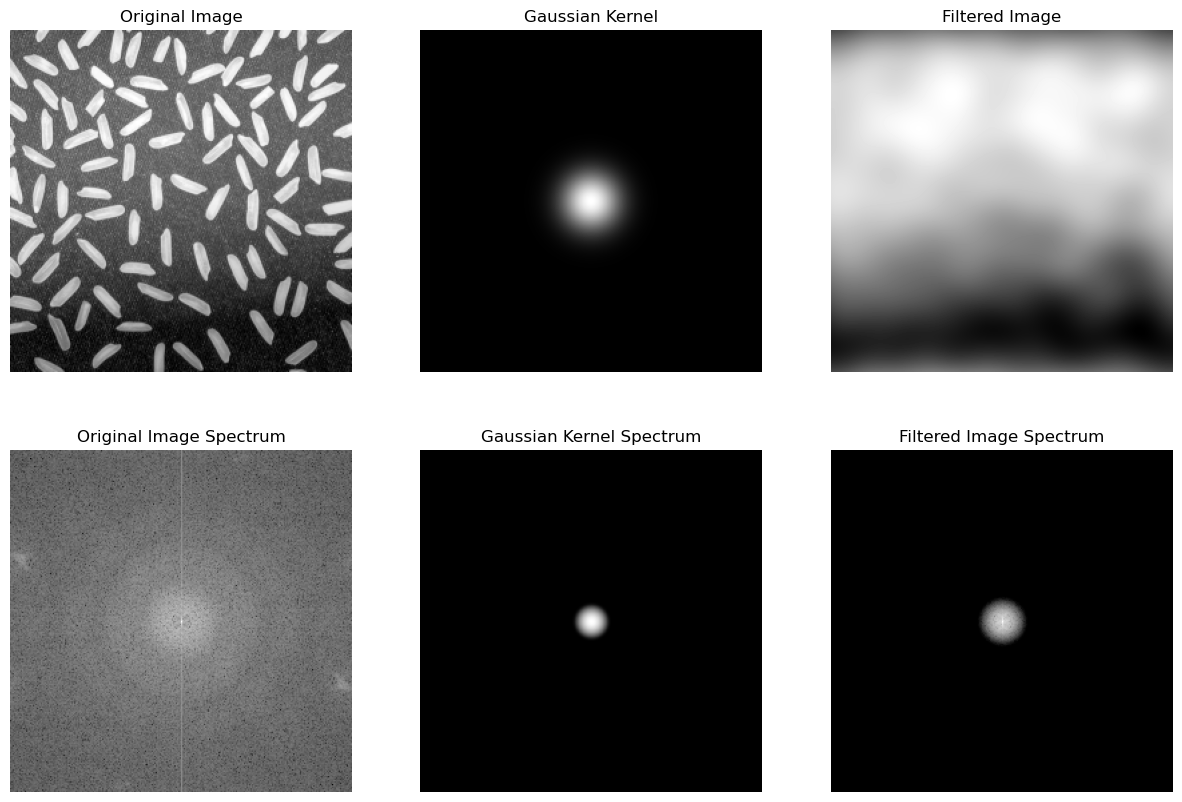

In [48]:
# convolve in the frequency domain and in the spatial domain 
#im = io.imread('images/image.tif');
im = io.imread('images/rice.png');
im_freq = fftn(im)

# create kernel of image size and sigma = 15
# convert it to frequency domain
gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 15), signal.gaussian(im_freq.shape[1], 15))
freq_kernel = fftn(ifftshift(gauss_kernel))

plt.figure(figsize=(15,10))
plt.subplot(2,3,1), 
plt.imshow(im,cmap='gray') 
plt.title('Original Image'), plt.axis('off')

plt.subplot(2,3,2), 
plt.imshow(gauss_kernel,cmap='gray') 
plt.title('Gaussian Kernel'), plt.axis('off')

plt.subplot(2,3,4), 
plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(im_freq)))),cmap='gray') 
plt.title('Original Image Spectrum'), plt.axis('off')

plt.subplot(2,3,5), 
plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(freq_kernel)))),cmap='gray') 
plt.title('Gaussian Kernel Spectrum'), plt.axis('off')


#
# Your code goes here 
#

im_freq_gauss = im_freq * freq_kernel
im_gauss = ifftn (im_freq_gauss).real
print (im_gauss.max(), im_gauss.min(), im_gauss.dtype)
plt.subplot(2,3,3),
plt.imshow(im_gauss, cmap='gray')
plt.title('Filtered Image'), 
plt.axis('off')
plt.subplot(2,3,6),
plt.imshow(np.real (10*np.log10(0.01 +abs(fftshift(im_freq_gauss)))),cmap='gray') 
plt.title('Filtered Image Spectrum'), plt.axis('off')

SciPy signal module's fftconvolve() function can be used to run the convolution in the frequency domain. (The function converts the image to the frequency domain, performs a multiplication and then converts the result back to the spatial domain). The function convolve() runs the convolution in the spatial domain. The following code runs these two functions and transforms `imblurred2` and `im_blurred1` to the frequency domain to display the frequency septrum. 

/tmp/ipykernel_7309/2839377594.py:1: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 0.5), signal.gaussian(im_freq.shape[1],0.5))


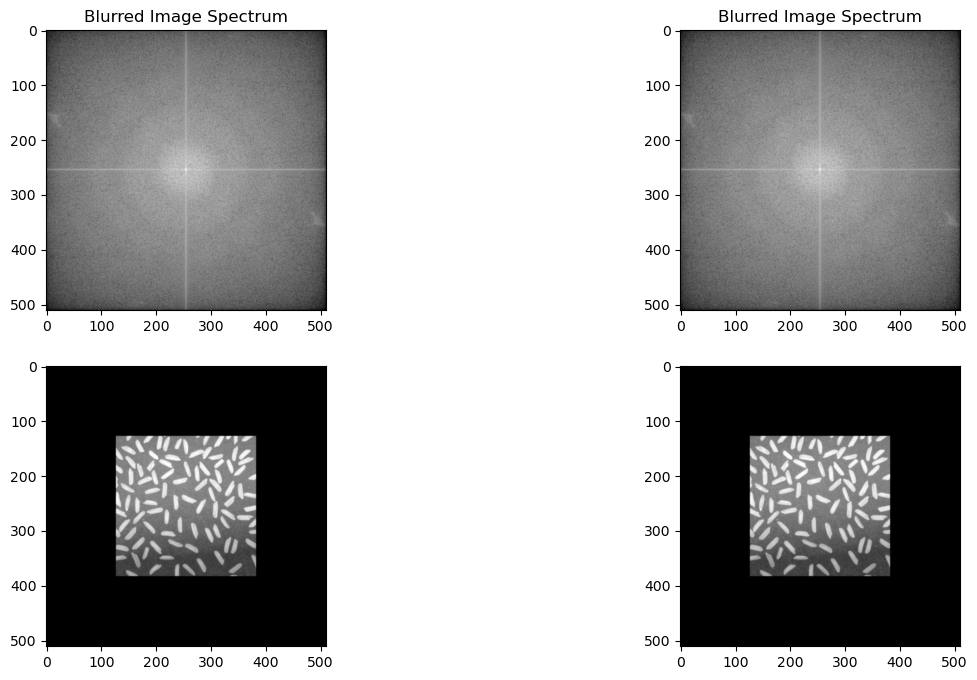

In [49]:

gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 0.5), signal.gaussian(im_freq.shape[1],0.5))

im_blurred1 = signal.convolve(im, gauss_kernel, mode = 'full')
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode = 'full')

F1 = fftn((im_blurred1).astype(float))
F2 = fftshift( F1 )
plt.figure(figsize=(15,8))
plt.subplot(2,2,1), 
plt.imshow(20*np.log10( 0.1 + np.abs(F2)), cmap='gray')
plt.title('Blurred Image Spectrum')
F1 = fftn((im_blurred2).astype(float))
F2 = fftshift( F1 )
plt.subplot(2,2,2), 
plt.imshow(20*np.log10( 0.1 +np.abs(F2)), cmap='gray')
plt.title('Blurred Image Spectrum')
plt.subplot(2,2,3),
plt.imshow(im_blurred1,cmap='gray')
plt.subplot(2,2,4),
plt.imshow(im_blurred2,cmap='gray')


# Advanced Level
# 5. Band pass filtering
Band pass filtering allows frequencies in a certain band and rejects all other frequencies. 
The code below creates an ideal band pass filter `ibpf` in frequency space.  

1. Display the ideal band pass filter. 
2. Transform your image to frequency space and center your spectrum (`fftshift`)
3. Multiply the ideal band pass filter with the result of Question 2.
4. Perform an inverse transform for the result of Question 3. (Note: you might need to do a `ifftshift`) 
5. Display the original image and the result of Question 4.
6. Change the values of the high and low frequency cutoffs (`limit_high` and `limit_low`) and observe how the results change. 

Text(0.5, 1.0, 'Band pass spectrum')

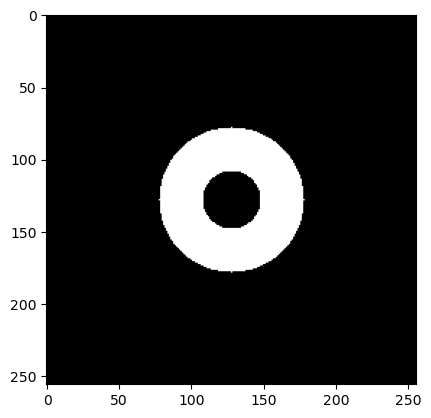

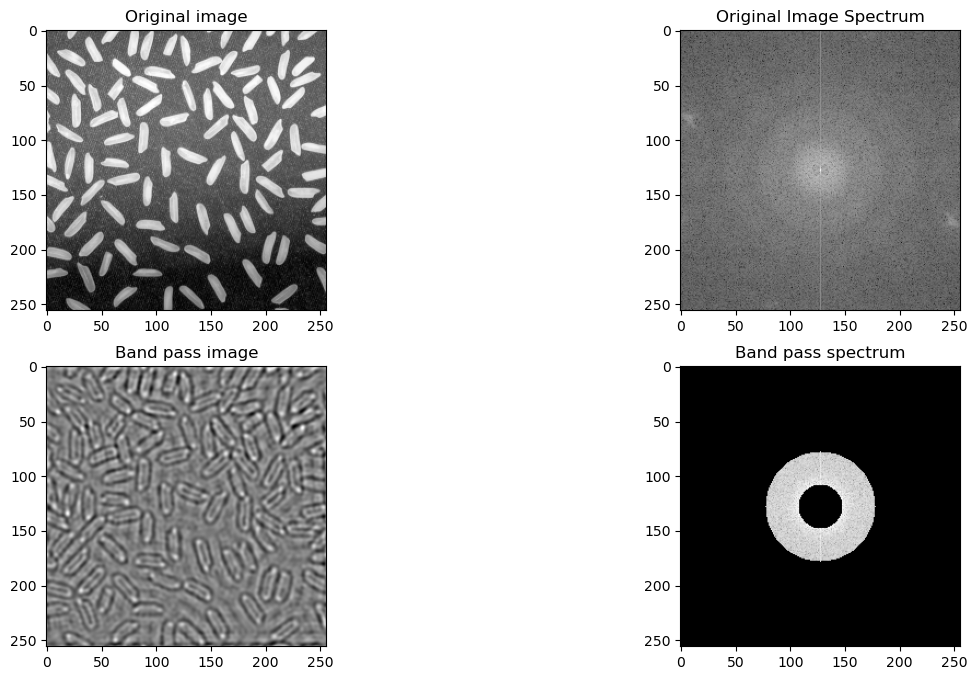

In [57]:
# load the image
im = io.imread('images/rice.png');

# set the high frequency cutoff
limit_high = 50
# set the low frequency cutoff 
limit_low = 20

# create an array of ones 
ibpf = np.ones(im.shape)
(w, h) = ibpf.shape
half_w, half_h = int(w/2), int(h/2)

# create the bandpass filter 
for y in range(ibpf.shape[0]):
    for x in range (ibpf.shape[1]):
        xx = y- half_w
        yy = x - half_h
        radius = np.sqrt(xx*xx + yy*yy)
        if(radius < limit_low):
            ibpf[y][x] = 0
            
        if(radius > limit_high):
            ibpf[y][x] = 0
            
# 
# Your code goes here
## 

# 1
plt.figure()
plt.imshow(ibpf, cmap ='gray')

# 2
F = fftn(im) 
Fc =fftshift (F)

# 3
Fc_bp = Fc * ibpf

# 4
F_bp = ifftshift (Fc_bp)
im_bp = ifftn(F_bp).real
im_bp = im_bp-im_bp.min()
im_bp = im_bp/im_bp.max()
plt.figure(figsize=(15,8))
plt.subplot(2,2,1),
plt.imshow(im, cmap='gray'), plt.title('Original image') 
plt.subplot (2,2,2),
plt.imshow(20* np. log10( 0.1 +np.abs (Fc)), cmap='gray')
plt.title('Original Image Spectrum')
plt.subplot(2,2,3),
plt.imshow(im_bp, cmap='gray'), 
plt.title('Band pass image')
plt.subplot(2,2,4),
plt.imshow(20*np. log10( 0.1 +np.abs (Fc_bp)), cmap='gray'), 
plt.title('Band pass spectrum')

# 6. Notch filtering 
Notch filter blocks/rejects a few chosen frequencies from the frequency domain representation of the image (obtained with DFT),  It is useful for removing periodic noise from images. The code below applies a sinusoidal noise to an image of sinusoidal noise. 

Text(0.5, 1.0, 'Image Spectrum with Added Noise')

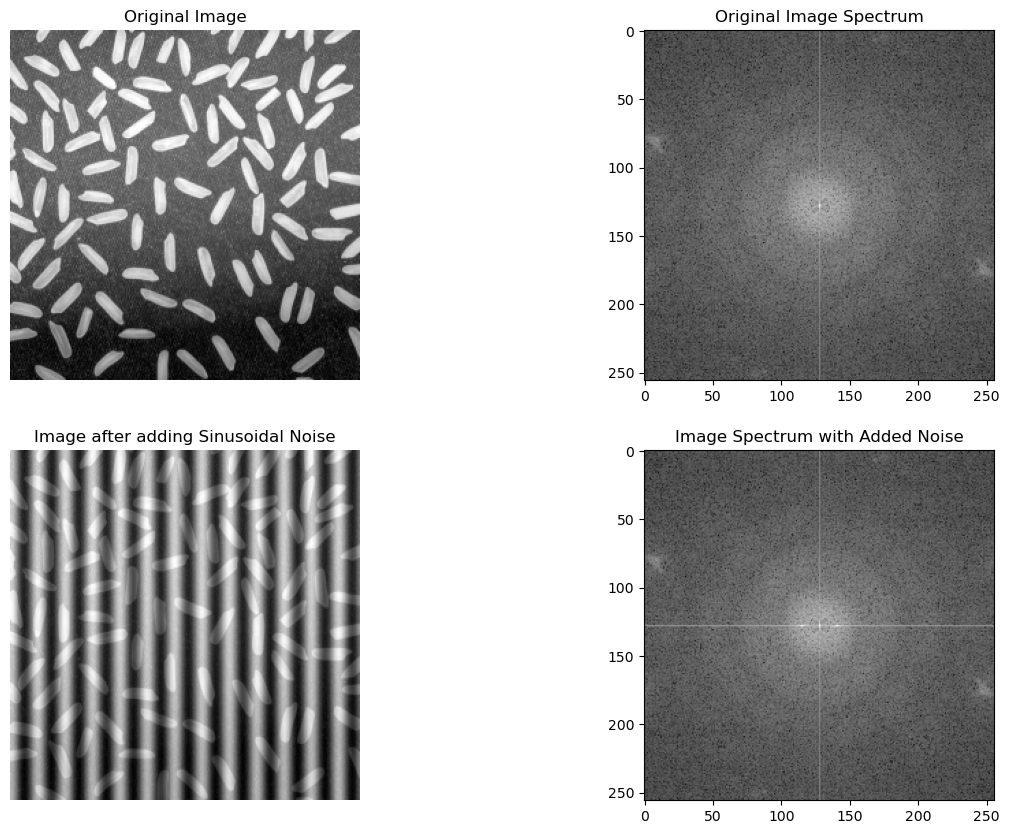

In [52]:
# load image

plt.figure(figsize=(15,10))
# load image
#im = io.imread('images\original_test_pattern_freq.tif')
im = io.imread('images/rice.png');

im = im.astype(float)
im = (im - im.min())/(im.max()-im.min())
imOrig = np.copy(im)

# convert to the frequency spectrum 
F1 = fftn(imOrig)
imFc = fftshift(F1)    

# add sinisodial noise  
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
    
# convert to frequency spectrum     
F1 = fftn(im)
imFd = fftshift(F1)
    
plt.subplot(2,2,1),
plt.imshow(imOrig, cmap='gray'), plt.axis('off')
plt.title('Original Image')

plt.subplot(2,2,2), 
plt.imshow( (20*np.log10( 0.1 + np.abs(imFc))).astype(int), cmap='gray')
plt.title('Original Image Spectrum')
# add periodic noise to the image

plt.subplot(2,2,3), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.title('Image after adding Sinusoidal Noise')

plt.subplot(2,2,4), 
plt.imshow( (20*np.log10( 0.1 + np.abs(imFd))).astype(int), cmap='gray')
plt.title('Image Spectrum with Added Noise')


Apply a notch filter to eliminate the frequencies that are responsible for Sinusoidal noise. You can do that by 
setting those frequencies components to zero. Display the spectrum after notch filtering. Convert the spectrum back to image space and display the image after notch filtering.  The restored image may look more blur compared to the original image as some of the true frequenceues from the original image could be rejected.

Text(0.5, 1.0, 'Image Spectrum with Notch Filter')

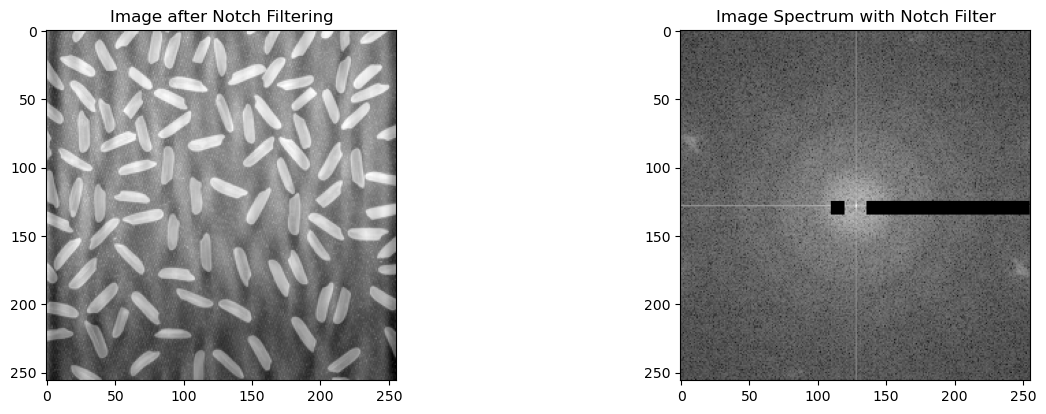

In [55]:
#
# Your code goes here 
#

F2 = imFd.copy()
F2[125:135, 110:120] = 0 
F2[125:135, F2.shape[1]-120: -1] = 0
F2a = ifftshift (F2)
imgF2 = ifftn(F2a).real
plt.figure(figsize=(15,10))
plt.subplot(2,2,1),
plt.imshow(imgF2, cmap='gray')
plt.title('Image after Notch Filtering')
plt.subplot(2,2,2),
plt.imshow( (20* np. log10( 0.1 + np.abs (F2))).astype (int), cmap='gray')
plt.title('Image Spectrum with Notch Filter')

# 7. Separating the frequency components in a Fourier transformed image 
Typically, images by nature are smooth and that is why most images can be represented using a handful of DFT coefficients and all of the remaining higher coefficients tend to be almost negligible/zeros. The code below finds and displays the first 5 lowest frequencies of the image  

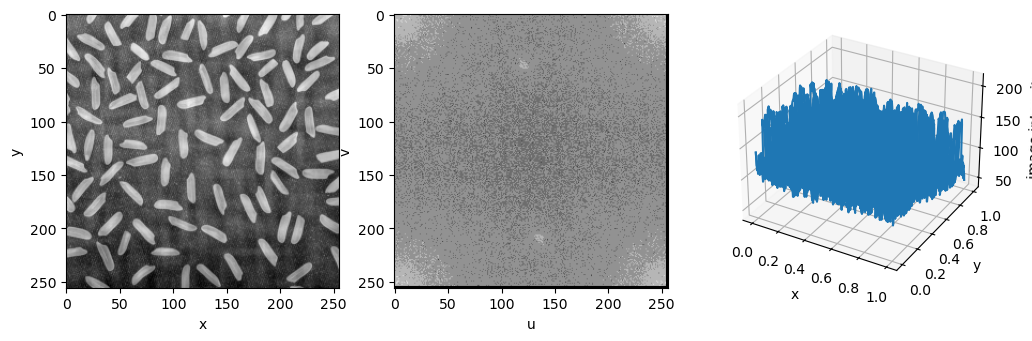

In [53]:
from PIL import Image
%matplotlib inline
im = Image.open("images/rice.png")
#im = Image.open('images\original_test_pattern_freq.tif')
low = 0
high =-2

# Do Fourier Transform on image.
ft = fftn(im)
# copy the frequencies from low to high but all others stay zero.
ft2 = np.zeros_like(ft)
ft2[low:high, low:high] = ft[low:high, low:high]
rft = ifftn(ft2).real
img1  = Image.fromarray(rft)
img1 = np.asarray(img1)
fig = plt.figure(figsize=(12,6)) 
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,3,2)
plt.imshow(20*np.log10( 0.1 + np.abs(ft2)).astype(int), cmap='gray')
plt.xlabel('u')
plt.ylabel('v')

x = np.linspace(0, 1, img1.shape[0])
y =  np.linspace(0, 1, img1.shape[1])
X, Y = np.meshgrid(x, y)
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_wireframe(X, Y, img1, cmap='summer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('image intensity');


1. Create a function which inputs the spectrum, low and a high frequency and displays the result.  
2. Using for loops and subplots, set low = 0 for all cases and display the image when high = [1,3,7,15,30,60,100,250,300] 

range(1, 10)


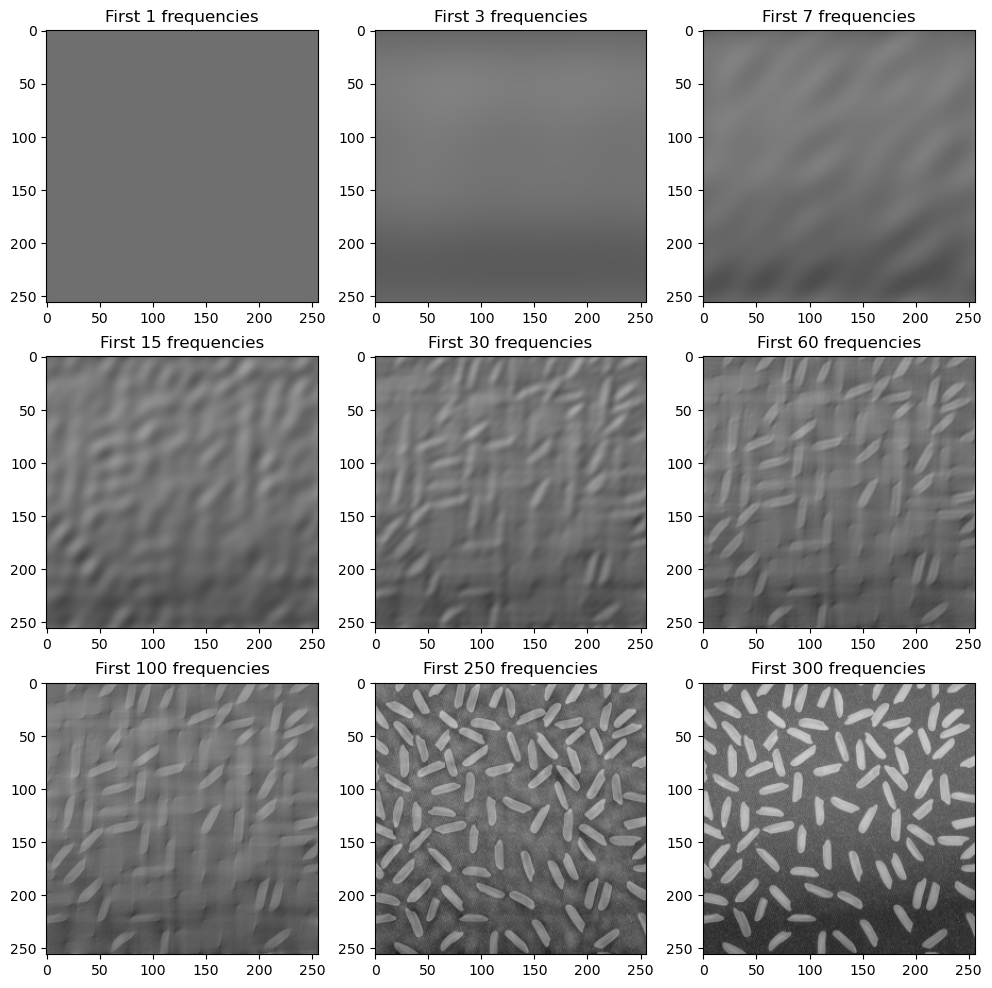

In [56]:
#
# Your code goes here 
#

def display_frequency_components (ft, low, high):
    ft2 = np. zeros_like(ft)
    ft2[low:high, low:high] = ft[ low: high, low:high] 
    rft = ifftn(ft2). real
    return Image.fromarray(rft)

highf = [1,3,7,15,30,60,100,250,300]
num = len(highf)
im = Image.open("images/rice.png")
low = 0 
high =6

ft = fftn(im)
print(range(1,10))
counter = 1
plt.figure(figsize=(12,12))
for (n,h) in zip (range(1,10), highf):
    plt.subplot(3,3, n)
    img=display_frequency_components (ft, 0,h) 
    plt.imshow(img, cmap = 'gray')
    plt.title('First %d frequencies' %h)